# WISE Infilling Example

Example of using proc_continuous to infill an arbitrary masked region of an image. This examples uses a subimage from the WISE 12 um dust map (tile 115).

Requires Julia Kernel

In [1]:
# Load needed packages

using Pkg
using FITSIO
using StatsBase
using CloudClean
using CairoMakie
using ColorSchemes
using OffsetArrays

In [2]:
#parameters. right click - format cell - mark as parameters
# This cell must be tagged with "parameters"

image_path = "default/image/path.fits"
mask_path = "default/mask/path.fits"
save_path = "default/save/path.fits"

"default/save/path.fits"

In [3]:
# Parameters
mask_path = "C:\\Users\\jhoffm72\\Documents\\FilPHANGS\\Data\\ngc7496_F770W\\Source_Removal\\_CDDfs0004pix_CDDfs0004pix_F770W_CDDfs_sources_S2N_mask.fits"
image_path = "C:\\Users\\jhoffm72\\Documents\\FilPHANGS\\Data\\OriginalImages\\ngc7496_F770W_JWST_Emission_starsub.fits"
save_path = "C:\\Users\\jhoffm72\\Documents\\FilPHANGS\\Data\\ngc7496_F770W\\Source_Removal\\OriginalImageSourcesRemoved.fits"
widx = 275


275

In [4]:
using FITSIO

# --- Open the FITS file safely ---
f = FITS(image_path)

# Function to safely extract image + header from possible HDU indices
function get_image_data(f::FITS)
    possible_hdus = [1, 2, 3, 0]  # try these HDUs in order
    for h in possible_hdus
        try
            hdu = f[h]
            # Check that this HDU actually contains image data
            if isa(hdu, ImageHDU)
                data = read(hdu)
                hdr = read_header(hdu)
                return data, hdr
            end
        catch e
            # Silently skip if index is out of range or unreadable
            continue
        end
    end
    error(" No valid ImageHDU found in FITS file. Tried HDUs [0,1,2,3].")
end

raw_image, header = get_image_data(f)

out_image = copy(raw_image)

out_image[isnan.(raw_image)] .= 0.0

close(f)


In [5]:
# Mask with missing pixels
f = FITS(mask_path)
raw_mask = read(f[1])
close(f)

# Convert the raw mask data into a boolean mask (True for masked pixels, False otherwise)
bimage = raw_mask .!= 0  # Create a boolean mask, True where non-zero

# Now bimage is a boolean array with True for masked pixels and False for unmasked pixels
println("Mask shape: ", size(bimage))

Mask shape: 

(1349, 1896)


In [6]:
Np = 15
out_image[bimage].= 0
count(bimage)

142981

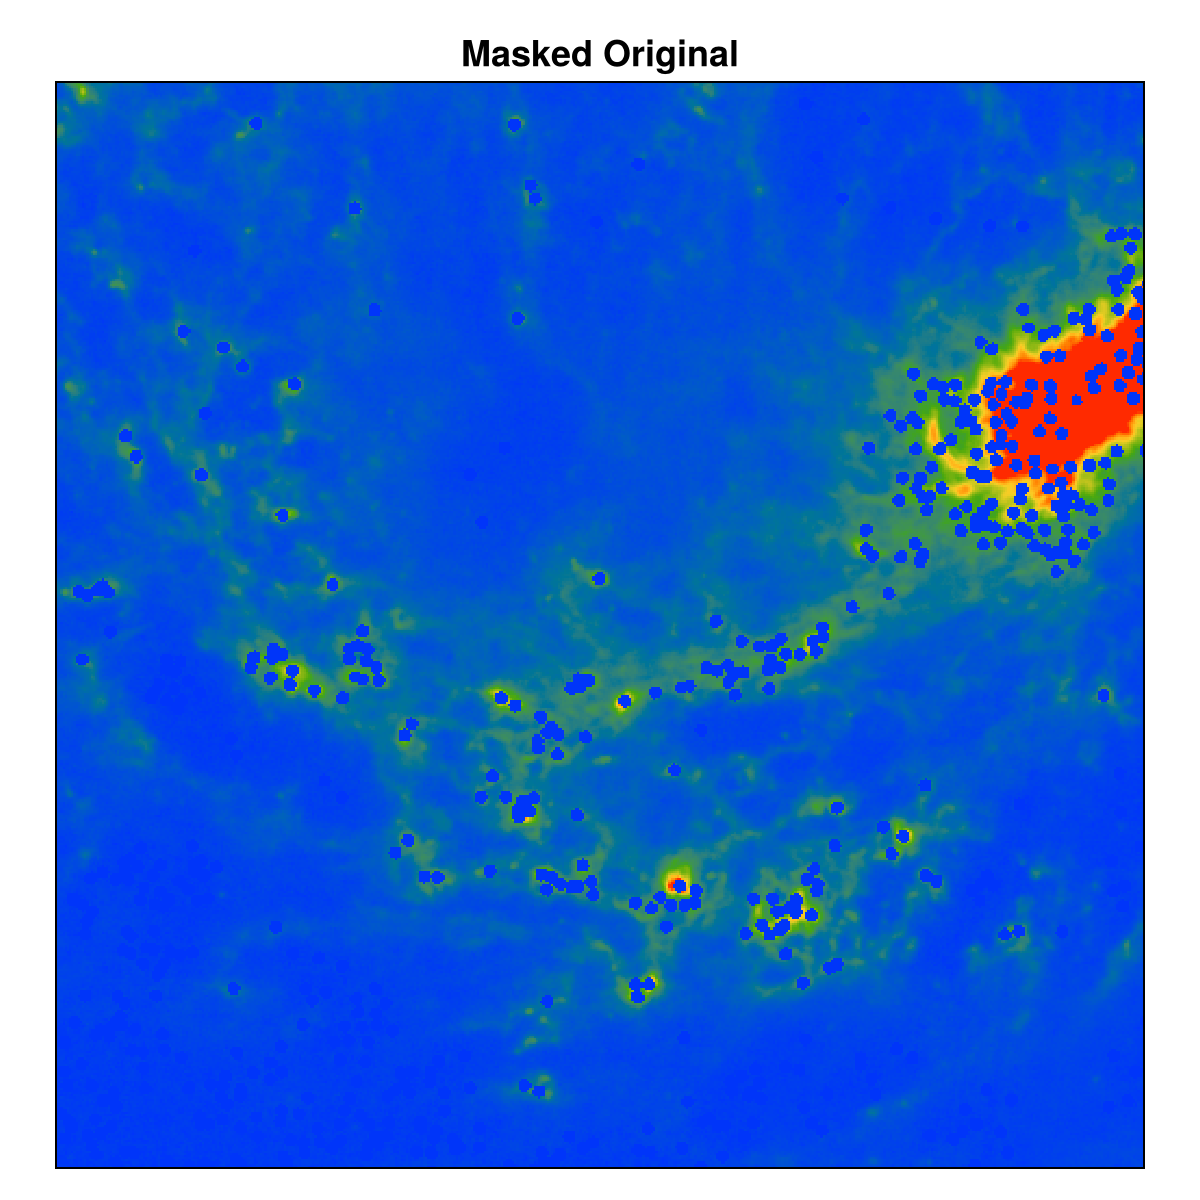

In [7]:
# Example values for cenx, ceny, and dv; adjust these based on your data
cenx = 579
ceny = 579
dv = 250

# Assuming raw_image is your image data and out_image is the image you want to display
# Compute the color range based on percentiles in a region around (cenx, ceny)
vmin, vmax = percentile(out_image[(cenx-dv):(cenx+dv), (ceny-dv):(ceny+dv)], [2, 99])

# Create a figure for plotting
fig = Figure(size=(600, 600), fontsize=18)

# Set up the axis with no ticks or labels
ax = Axis(fig[1,1], aspect=1, title="Masked Original", xticksvisible=false, yticksvisible=false, 
          xticklabelsvisible=false, yticklabelsvisible=false)

# Display the heatmap using the chosen colormap and the computed color range
h = heatmap!(ax, out_image[(cenx-dv):(cenx+dv), (ceny-dv):(ceny+dv)]',
    colormap=:rainbow_bgyr_35_85_c73_n256,
    colorrange=(vmin, vmax)
)

# Resize the figure to fit the layout
resize_to_layout!(fig)

# Show the figure
fig


In [8]:
ndraw0 = 2
x_locs = [cenx]
y_locs = [ceny]
star_stats = proc_continuous(out_image,bimage,Np=Np,tilex=4,ftype=64,widx=widx,seed=2022,ndraw=ndraw0)


# Debug: Check the structure of star_stats
if isa(star_stats, Tuple)
    println("star_stats is a tuple with length: ", length(star_stats))
    for i in 1:length(star_stats)
        println("star_stats[$i] has type: ", typeof(star_stats[i]), " and size: ", size(star_stats[i]))
    end
else
    println("star_stats is not a tuple. It has type: ", typeof(star_stats))
end

Infilling completed after 1 rounds with final width (widx,widy) = (27,27)


Finished 200 of 5787 locations in tile (1, 1)


Finished 371 of 11220 locations in tile (1, 2)


Finished 241 of 7088 locations in tile (1, 3)

Finished 2 of 39 locations in tile (1, 4)

Finished 528 of 17078 locations in tile (2, 1)


Had to use SVD for icov_kgood_kgood at (x,y) = (555,948)
Had to use SVD for sqrt_cov at (x,y) = (555,948)

Had to use SVD for icov_kgood_kgood at (x,y) = (547,946)
Had to use SVD for sqrt_cov at (x,y) = (547,946)
Finished 330 of 10803 locations in tile (2, 2)

Had to use SVD for icov_kgood_kgood at (x,y) = (580,1203)


Had to use SVD for sqrt_cov at (x,y) = (580,1203)
Had to use SVD for icov_kgood_kgood at (x,y) = (557,1194)
Had to use SVD for sqrt_cov at (x,y) = (557,1194)
Had to use SVD for icov_kgood_kgood at (x,y) = (572,1205)
Had to use SVD for sqrt_cov at (x,y) = (572,1205)
Had to use SVD for icov_kgood_kgood at (x,y) = (554,1202)
Had to use SVD for sqrt_cov at (x,y) = (554,1202)
Had to use SVD for icov_kgood_kgood at (x,y) = (575,1213)
Had to use SVD for sqrt_cov at (x,y) = (575,1213)
Had to use SVD for icov_kgood_kgood at (x,y) = (546,1202)
Had to use SVD for icov_kgood_kgood at (x,y) = (556,1210)
Had to use SVD for sqrt_cov at (x,y) = (556,1210)
Had to use SVD for icov_kgood_kgood at (x,y) = (598,1226)
Had to use SVD for sqrt_cov at (x,y) = (598,1226)
Had to use SVD for icov_kgood_kgood at (x,y) = (548,1210)
Had to use SVD for icov_kgood_kgood at (x,y) = (604,1234)
Had to use SVD for icov_kgood_kgood at (x,y) = (596,1234)


Had to use SVD for icov_kgood_kgood at (x,y) = (603,1242)
Had to use SVD for icov_kgood_kgood at (x,y) = (588,1244)
Had to use SVD for icov_kgood_kgood at (x,y) = (598,1250)
Had to use SVD for sqrt_cov at (x,y) = (598,1250)
Had to use SVD for icov_kgood_kgood at (x,y) = (548,1234)
Had to use SVD for sqrt_cov at (x,y) = (548,1234)
Had to use SVD for icov_kgood_kgood at (x,y) = (580,1248)
Had to use SVD for icov_kgood_kgood at (x,y) = (581,1261)
Finished 438 of 13657 locations in tile (2, 3)

Finished 31 of 1169 locations in tile (2, 4)


Finished 407 of 12821 locations in tile (3, 1)


Finished 223 of 7016 locations in tile (3, 2)


Had to use SVD for sqrt_cov at (x,y) = (721,1394)


Had to use SVD for sqrt_cov at (x,y) = (721,1416)
Finished 425 of 13981 locations in tile (3, 3)


Finished 133 of 4221 locations in tile (3, 4)


Finished 367 of 11130 locations in tile (4, 1)


Finished 491 of 15062 locations in tile (4, 2)


Finished 346 of 10538 locations in tile (4, 3)


Finished 46 of 1371 locations in tile (4, 4)


star_stats is a tuple with length: 

2
star_stats[1] has type: 

Matrix{

Float64} and size: (1349, 1896)
star_stats[2] has type: OffsetArray{Float64, 3, Array{Float64, 3}} and size: (1349, 1896, 2)


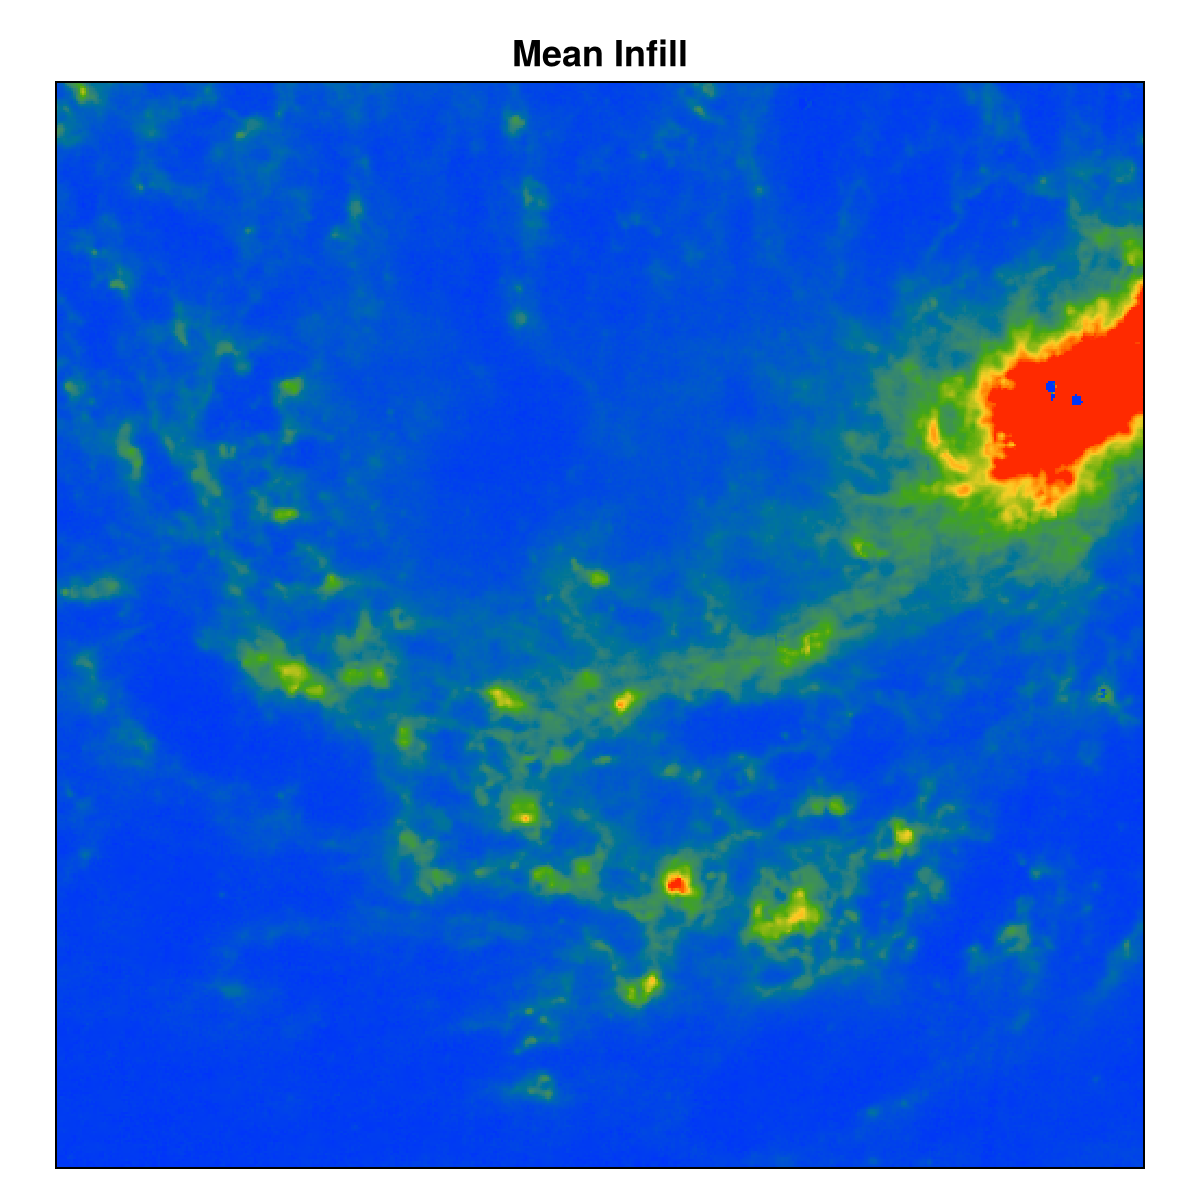

In [9]:
cenx = 579
ceny = 579
dv = 250
vmin, vmax = percentile(out_image[(cenx-dv):(cenx+dv),(ceny-dv):(ceny+dv)],[2,99])
fig = Figure(size=(600, 600), fontsize=18)
ax = Axis(fig[1,1], aspect=1, title="Mean Infill", xticksvisible=false, yticksvisible=false, 
          xticklabelsvisible=false, yticklabelsvisible=false)
h = heatmap!(ax,star_stats[1][(cenx-dv):(cenx+dv),(ceny-dv):(ceny+dv)]',
    colormap=:rainbow_bgyr_35_85_c73_n256,
    colorrange=(vmin,vmax)
)

resize_to_layout!(fig)
fig

In [10]:
dv = 250
fig = Figure(size=(600, 600), fontsize=18)
ax = Axis(fig[1,1], aspect=1, title="Draw Infill", xticksvisible=false, yticksvisible=false, 
          xticklabelsvisible=false, yticklabelsvisible=false)
h = heatmap!(ax,star_stats[2][(cenx-dv):(cenx+dv),(ceny-dv):(ceny+dv),1]',
    colormap=:rainbow_bgyr_35_85_c73_n256,
    colorrange=(vmin,vmax)
)

# Convert to a standard Array
array_data = max.(parent(star_stats[2]), 0)  # Set negative values to zero

# Open a FITS file and write
FITS(save_path, "w") do f
    write(f, convert(Array, array_data); header = header)  # Ensure it's a proper Array
end

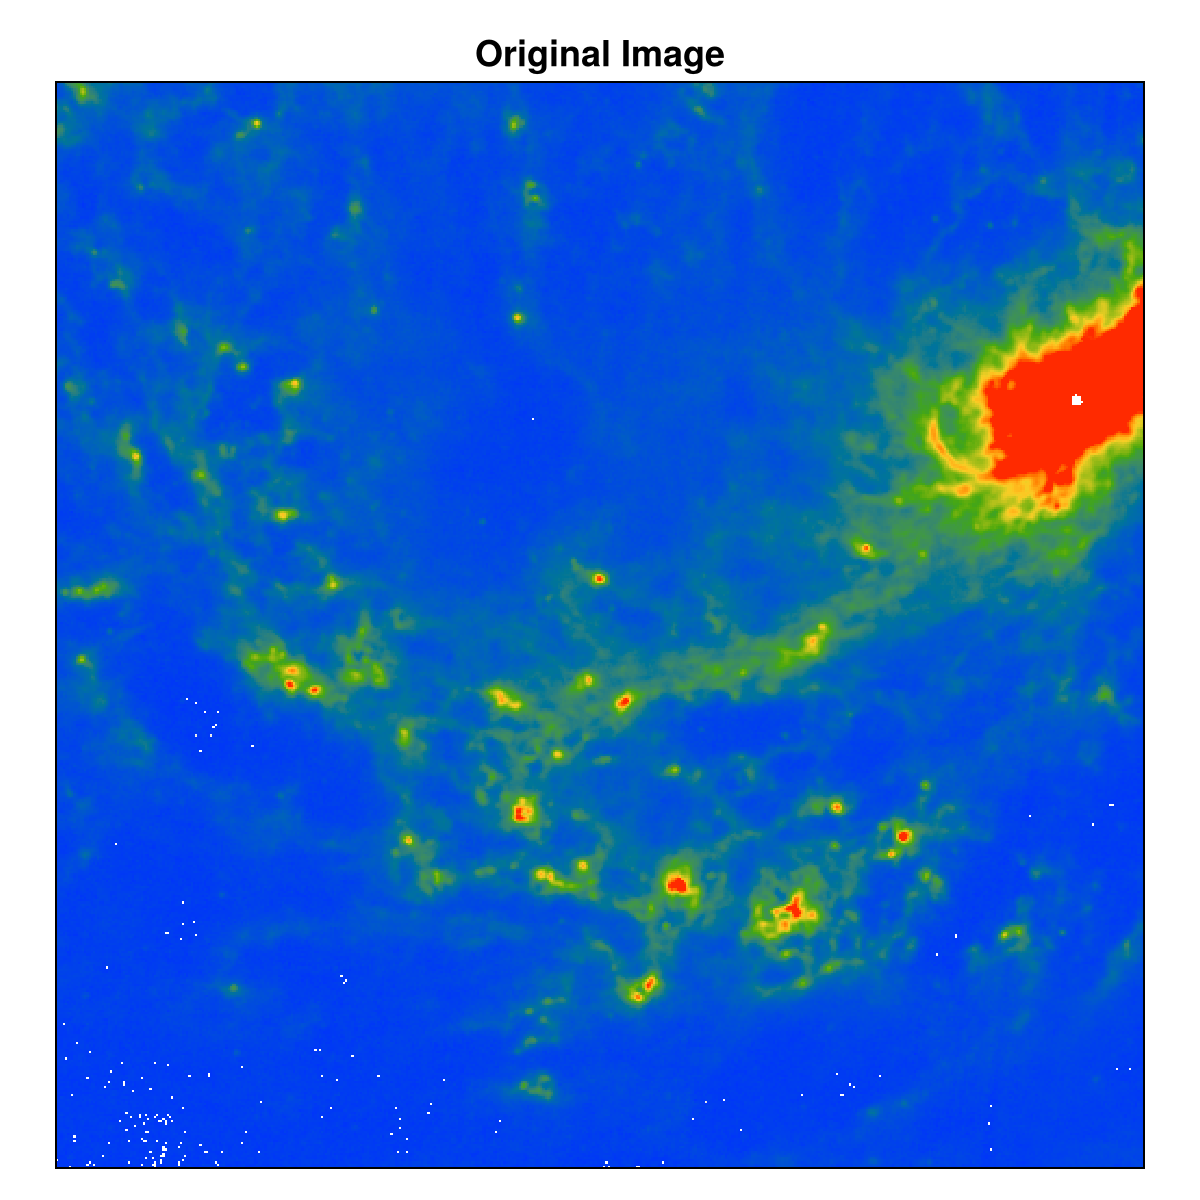

In [11]:
dv = 250
fig = Figure(size=(600, 600), fontsize=18)
ax = Axis(fig[1,1], aspect=1, title="Original Image", xticksvisible=false, yticksvisible=false, 
          xticklabelsvisible=false, yticklabelsvisible=false)
h = heatmap!(ax,raw_image[(cenx-dv):(cenx+dv),(ceny-dv):(ceny+dv)]',
    colormap=:rainbow_bgyr_35_85_c73_n256,
    colorrange=(vmin,vmax)
)

resize_to_layout!(fig)
fig